In [ ]:
# https://medium.com/codex/customer-segmentation-with-k-means-in-python-18336fb915be

In [2]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')

In [3]:
df = pd.read_csv('cust_seg.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.set_index('Customer Id', inplace = True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [18]:
print(cl(df['Age'].describe(), 'red', attrs = ['bold']))

count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'AGE DISTRIBUTION')

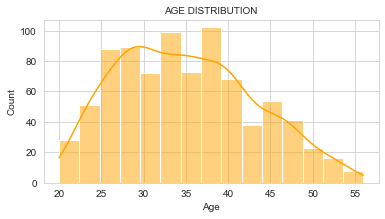

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
sb.histplot(df['Age'], color = 'orange', kde=True)
plt.title('AGE DISTRIBUTION', fontsize = 10)
# plt.xlabel('Age',fontsize = 16)
# plt.ylabel('Frequency', fontsize = 16)
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 14)

.......................................
Number of Default cases are 183
.......................................
Number of Non-Default cases are 517
.......................................
Percentage of Default cases is 35%
.......................................
/Users/koushik.saha/Repos/Segmentation/T2/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


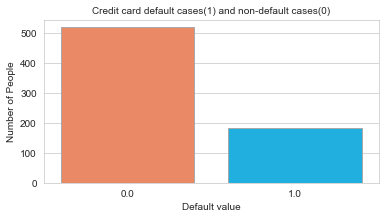

In [21]:
default = df[df['Defaulted'] == 1.0]
non_default = df[df['Defaulted'] == 0.0]

print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Default cases are {}'.format(len(default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Non-Default cases are {}'.format(len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Percentage of Default cases is {:.0%}'.format(len(default)/len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))

plt.figure(figsize=(6, 3))
sb.countplot(df['Defaulted'], palette = ['coral', 'deepskyblue'], edgecolor = 'darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)', fontsize = 10)
plt.xlabel('Default value', fontsize = 10)
plt.ylabel('Number of People', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

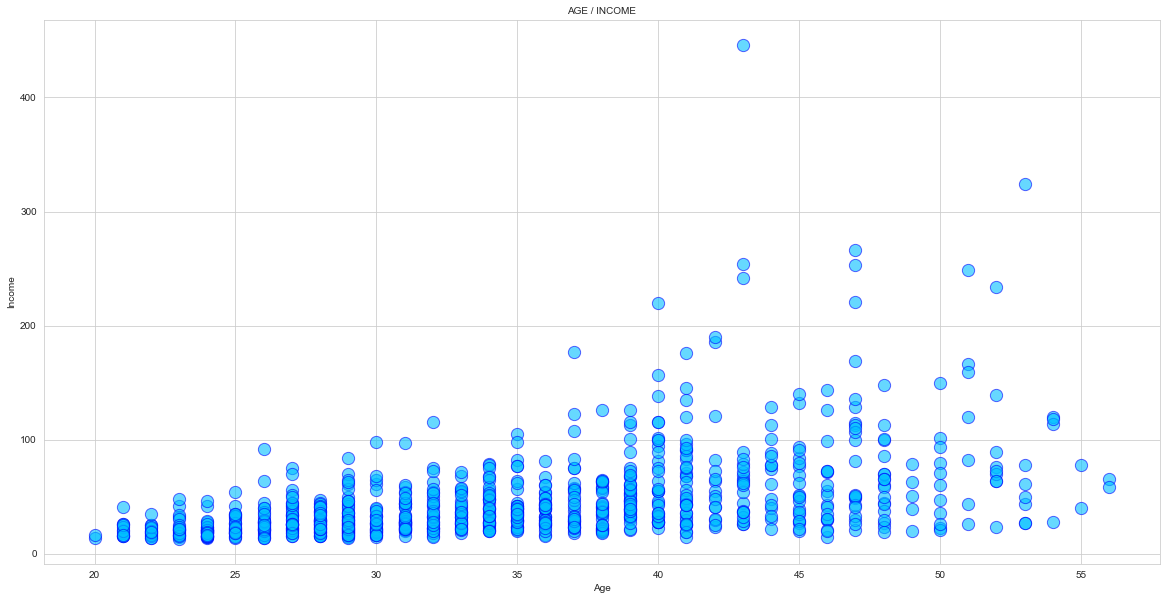

<Figure size 432x216 with 0 Axes>

In [23]:
sb.scatterplot(x='Age', y='Income', data = df, color = 'deepskyblue', s = 150, alpha = 0.6, edgecolor = 'b')
plt.title('AGE / INCOME', fontsize = 10)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Income', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.figure(figsize=(6, 3))

plt.show()

In [28]:
area = df.DebtIncomeRatio **2

sb.scatterplot(x='Years Employed', y='Income', 
               data = df, 
               s = area, 
               alpha = 0.6, 
               edgecolor = 'white', 
               hue = 'Defaulted', 
               palette = 'spring')
plt.title('YEARS EMPLOYED / INCOME', 
          fontsize = 18)
plt.xlabel('Years Employed', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

# plt.savefig('y_income.png')
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

In [29]:
X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])

Cluster data samples :  [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.52379654  0.39138677]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.90913822  1.59755385]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.52379654 -0.44250653]]


In [36]:
clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)
labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [37]:
df['cluster_num'] = labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,1
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [38]:
df.groupby('cluster_num').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster_num,,,,,,,,
0,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


/Users/koushik.saha/Repos/Segmentation/T2/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


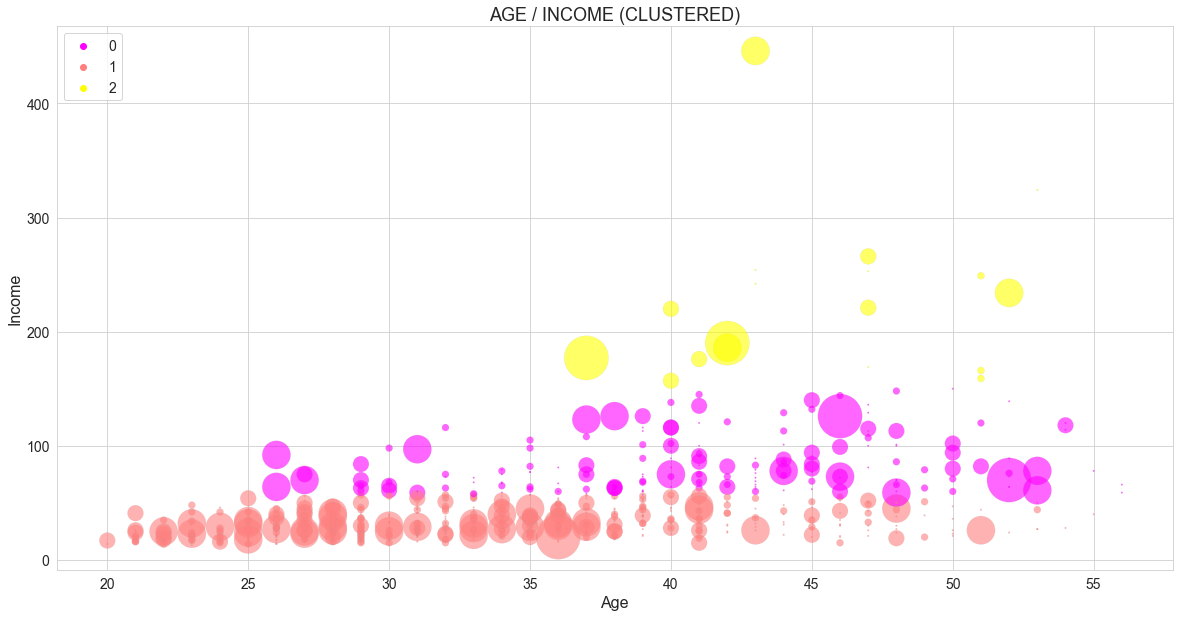

In [39]:
area = np.pi * (df.Edu) ** 4

sb.scatterplot('Age', 'Income', 
               data = df, 
               s = area, 
               hue = 'cluster_num', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / INCOME (CLUSTERED)', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

# plt.savefig('c_age_income.png')
plt.show()

/Users/koushik.saha/Repos/Segmentation/T2/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


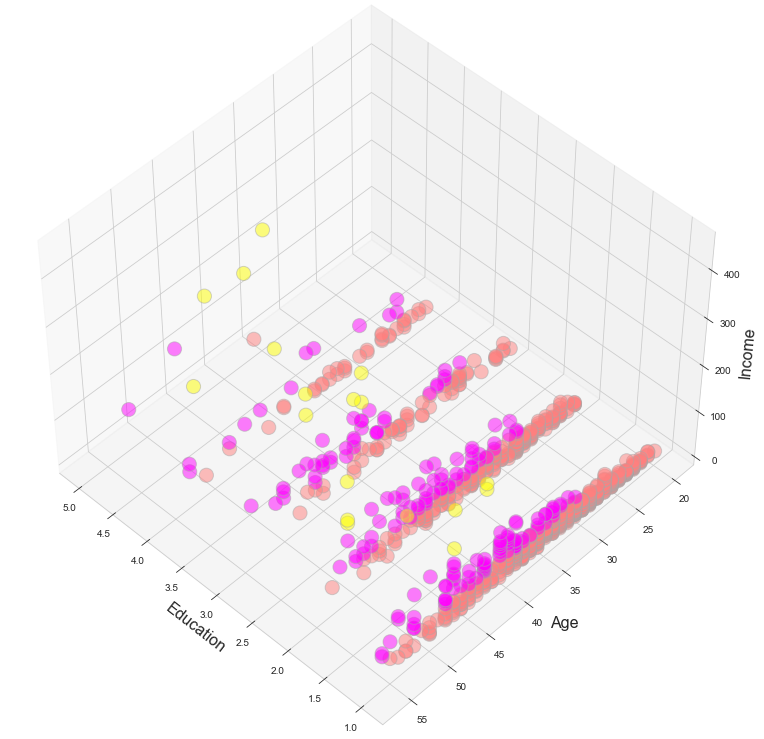

In [40]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(df['Edu'], df['Age'], df['Income'], 
           c = df['cluster_num'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Education', 
              fontsize = 16)
ax.set_ylabel('Age', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

plt.savefig('3d_plot.png')
plt.show()